# Get symmetry function for a given atom

In [1]:
from mlptools.io.read import read_from_n2p2_data
from dscribe.descriptors import ACSF
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

/Users/y1u0d2/opt/anaconda3/envs/mlp/lib/python3.11/site-packages/ovito/_extensions/averaging.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


In [2]:
# get mlpatoms from n2p2 input data
path2data = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/94/data'
mlpatoms = read_from_n2p2_data(path2data)

0 / 55069
1000 / 55069
2000 / 55069
3000 / 55069
4000 / 55069
5000 / 55069
6000 / 55069
7000 / 55069
8000 / 55069
9000 / 55069
10000 / 55069
11000 / 55069
12000 / 55069
13000 / 55069
14000 / 55069
15000 / 55069
16000 / 55069
17000 / 55069
18000 / 55069
19000 / 55069
20000 / 55069
21000 / 55069
22000 / 55069
23000 / 55069
24000 / 55069
25000 / 55069
26000 / 55069
27000 / 55069
28000 / 55069
29000 / 55069
30000 / 55069
31000 / 55069
32000 / 55069
33000 / 55069
34000 / 55069
35000 / 55069
36000 / 55069
37000 / 55069
38000 / 55069
39000 / 55069
40000 / 55069
41000 / 55069
42000 / 55069
43000 / 55069
44000 / 55069
45000 / 55069
46000 / 55069
47000 / 55069
48000 / 55069
49000 / 55069
50000 / 55069
51000 / 55069
52000 / 55069
53000 / 55069
54000 / 55069
55000 / 55069


In [3]:
# get symmetry function params from n2p2 input.nn
path2setting = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/94/three/03'
with open(os.path.join(path2setting, 'input.nn')) as f:
    lines = [s.strip() for s in f.readlines()]

In [4]:
g2_params = []
g4_params = []

sf_lines = list(filter(lambda x: 'symfunction_short' in x, lines))
sf_lines = [s.split(' ') for s in sf_lines]
for sf_line in sf_lines:
    sf_type = sf_line[2]
    if sf_type == '2':
        g2_params.append(sf_line[4:6])
    elif sf_type == '3':
        eta, lam, zeta = sf_line[5:8]
        g4_params.append([eta, zeta, lam])
    else:
        continue

g2_params = np.array(g2_params, dtype=float)
g4_params = np.array(g4_params, dtype=float)

print(f'Number of G2: {len(g2_params)}')
print(f'Number of G4: {len(g4_params)}')

Number of G2: 6
Number of G4: 8


In [6]:
g2_params, g4_params

(array([[8.257 , 1.    ],
        [4.544 , 1.348 ],
        [2.501 , 1.817 ],
        [1.376 , 2.449 ],
        [0.7573, 3.302 ],
        [0.4168, 4.451 ]]),
 array([[ 0.05556,  1.     , -1.     ],
        [ 0.05556,  1.     ,  1.     ],
        [ 0.05556,  6.     , -1.     ],
        [ 0.05556,  6.     ,  1.     ],
        [ 0.01389,  1.     , -1.     ],
        [ 0.01389,  1.     ,  1.     ],
        [ 0.01389,  6.     , -1.     ],
        [ 0.01389,  6.     ,  1.     ]]))

In [41]:
acsf = ACSF(
    species=['Si'],
    r_cut=6,
    g2_params=g2_params,
    g4_params=g4_params,
    periodic=True
)

In [51]:
all_sf_values = []
for i, atoms in enumerate(mlpatoms[:20]):
    # show progress bar
    if i % 100 == 0:
        print(f'{i}/{len(mlpatoms)}')
    ase_atoms = atoms.get_ase_atoms()
    sf_value = acsf.create(ase_atoms)
    all_sf_values.append(sf_value)

0/55069


In [52]:
all_sf_values = np.concatenate(all_sf_values, axis=0)

In [55]:
# path2save = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/94/three/03'
# np.save(os.path.join(path2save, 'all_sf_values.npy'), all_sf_values)

In [56]:
# load npy file
path2npy = "/Users/y1u0d2/desktop/Lab/result/n2p2/Si/94/three/03"
all_sf_values = np.load(os.path.join(path2npy, 'all_sf_values.npy'))

In [78]:
col_names = [f'G2_{i}' for i in range(len(g2_params))] + [f'G4_{i}' for i in range(len(g4_params))]
sf_df = pd.DataFrame(data=all_sf_values[:, 1:], columns=col_names)

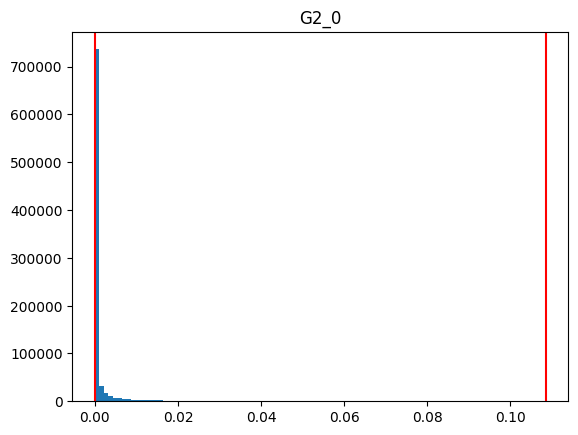

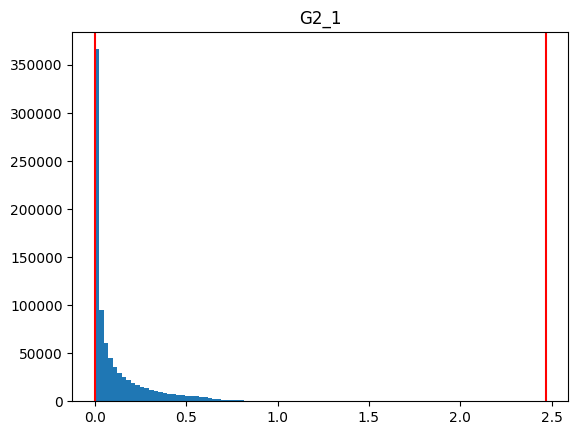

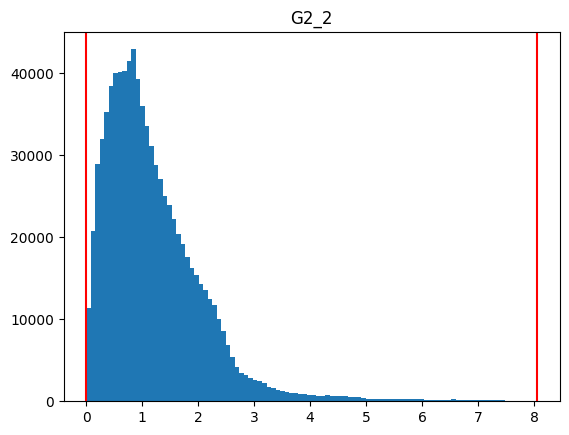

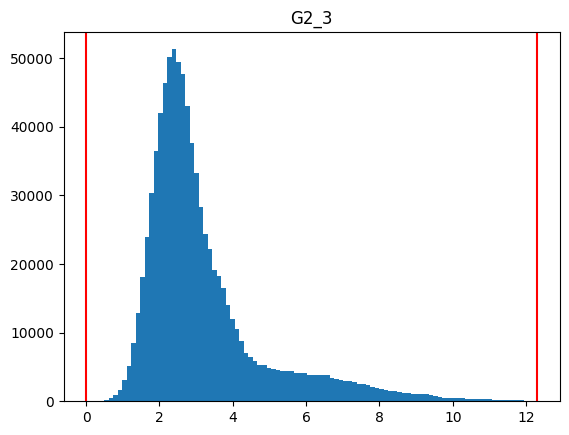

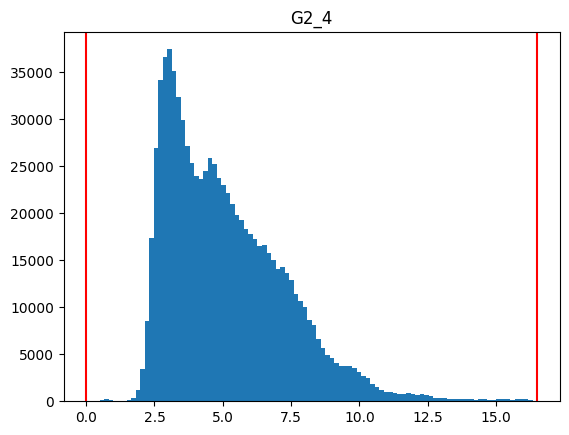

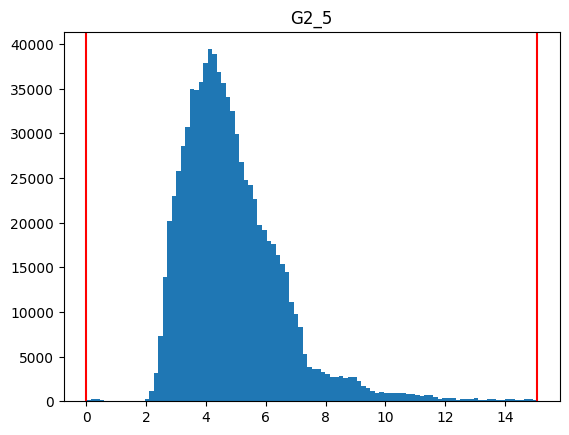

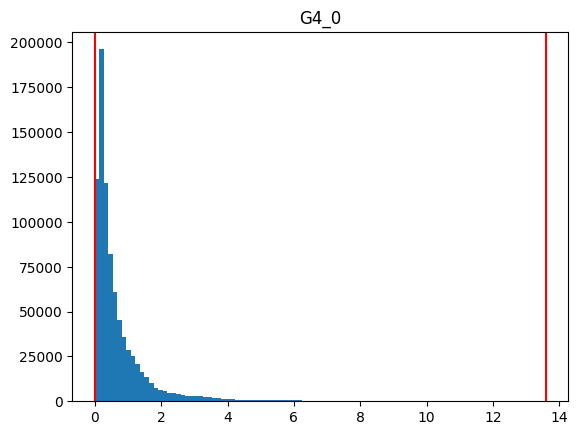

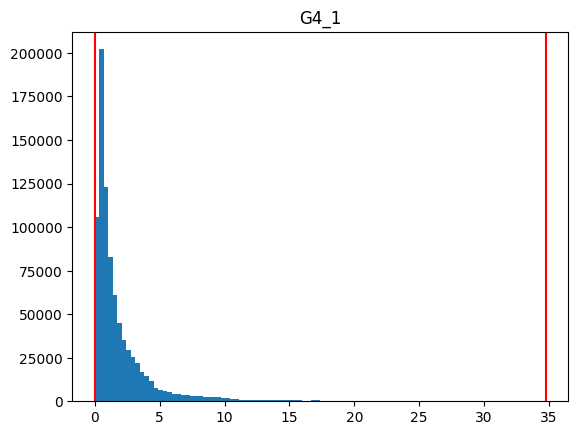

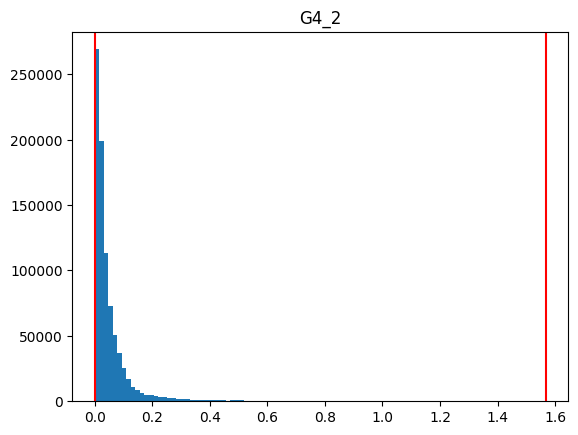

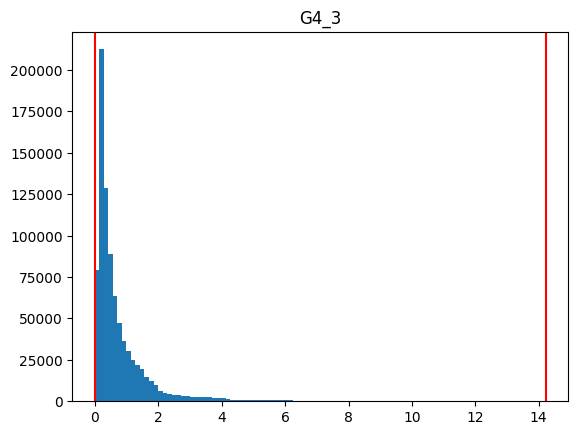

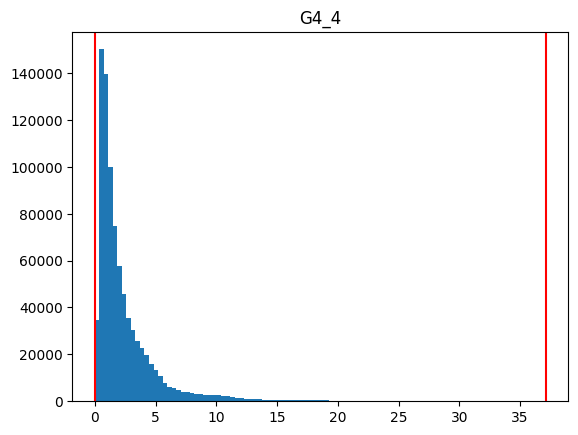

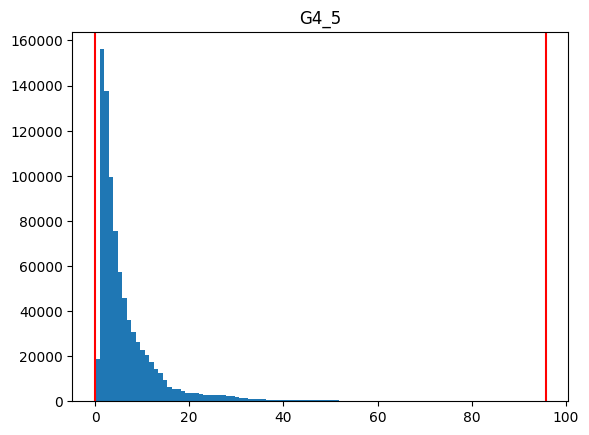

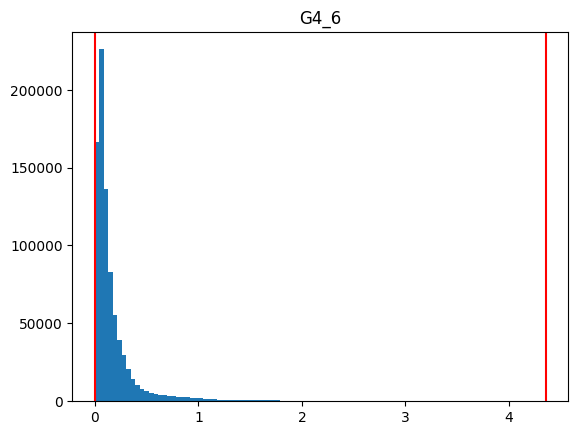

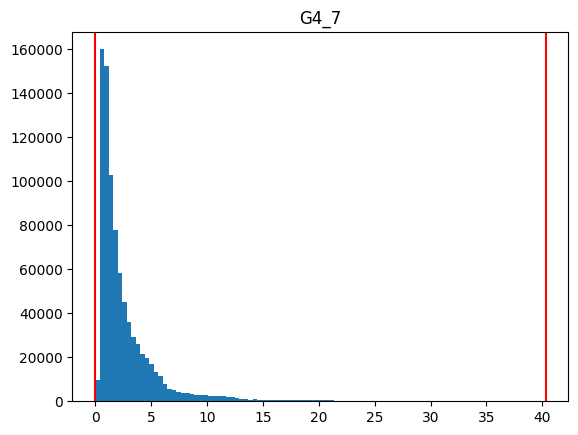

In [82]:
for col in sf_df.columns:
    # plot horisontal line at min and max
    plt.axvline(sf_df[col].min(), color='red')
    plt.axvline(sf_df[col].max(), color='red')
    plt.hist(sf_df[col], bins=100)
    plt.title(col)
    plt.show()

In [83]:
sf_df.to_csv(os.path.join(path2npy, 'sf_df.csv'), index=None)

In [85]:
from glob import glob
path2root = '/home/y1u0d2/result/qe/Si/slab/extrapolate_atoms'

for i in range(5):
    ex_dirs = glob(f'{path2root}/{i}/ex*')
    calculation_completed_count = 0
    for ex_dir in ex_dirs:
        if os.path.exists(os.path.join(ex_dir, 'scf.out')):
            calculation_completed_count += 1
    print(f'{i}: {calculation_completed_count}/{len(ex_dirs)}')

0
1
2
3
4
